# Connect to Kaggle

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"boruyang","key":"2faa51d90f9aa96c0c745e6fa276d6f0"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d jessicali9530/celeba-dataset

100% 1.33G/1.33G [00:07<00:00, 219MB/s]
100% 1.33G/1.33G [00:07<00:00, 198MB/s]


In [4]:
! unzip celeba-dataset.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  inflating: img_al

#EDA

In [ ]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("list_attr_celeba.csv")
data = data.replace(-1, 0)
data

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
202595,202596.jpg,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
202596,202597.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
202597,202598.jpg,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1


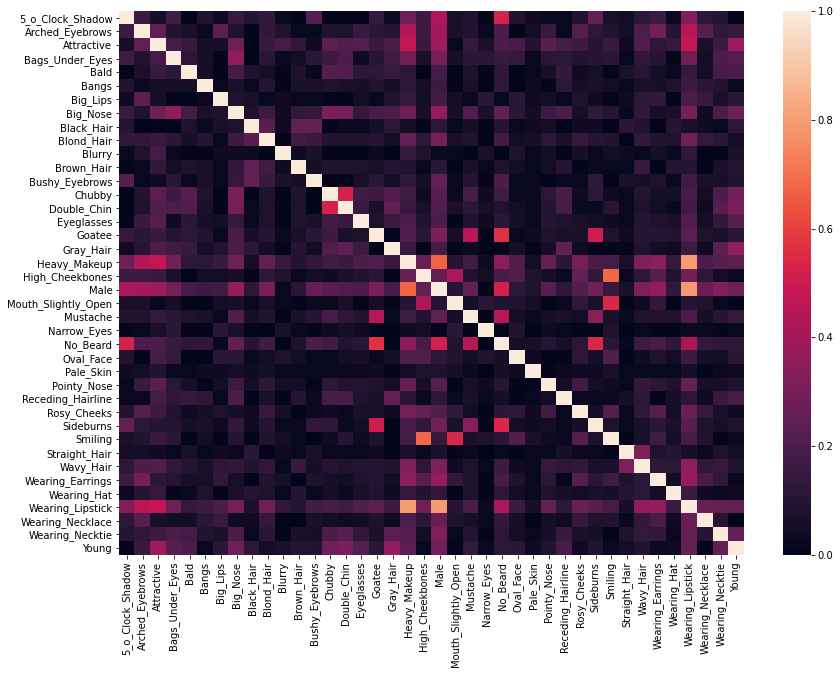

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cor_matrix = []
for i in range(1, len(data.columns)):
    cor_list = []
    for j in range(1, len(data.columns)):
        confusion_matrix = pd.crosstab(data.iloc[:,i], data.iloc[:,j]).values
        cor_list.append(format(round(cramers_v(confusion_matrix),2), ".2f"))
    cor_matrix.append(cor_list)

cor_matrix = pd.DataFrame(cor_matrix).apply(pd.to_numeric, errors='coerce')
cor_matrix.columns = data.columns[1:len(data.columns)]
cor_matrix.index = data.columns[1:len(data.columns)]

plt.figure(figsize=(14, 10))
sns.heatmap(cor_matrix)

In [ ]:
for i in range(1, len(cor_matrix.columns)):
    if sum(((cor_matrix > 0.4) & (cor_matrix != 1)).iloc[:,i]) == 0:
        pass
    else:
        print(cor_matrix.iloc[:,i][((cor_matrix > 0.4) & (cor_matrix != 1)).iloc[:,i]])
        print("\n")

Heavy_Makeup        0.44
Male                0.41
Wearing_Lipstick    0.46
Name: Arched_Eyebrows, dtype: float64


Heavy_Makeup        0.48
Wearing_Lipstick    0.48
Name: Attractive, dtype: float64


Double_Chin    0.53
Name: Chubby, dtype: float64


Chubby    0.53
Name: Double_Chin, dtype: float64


Mustache     0.45
No_Beard     0.57
Sideburns    0.51
Name: Goatee, dtype: float64


Arched_Eyebrows     0.44
Attractive          0.48
Male                0.67
Wearing_Lipstick    0.80
Name: Heavy_Makeup, dtype: float64


Mouth_Slightly_Open    0.42
Smiling                0.68
Name: High_Cheekbones, dtype: float64


5_o_Clock_Shadow    0.42
Arched_Eyebrows     0.41
Heavy_Makeup        0.67
No_Beard            0.52
Wearing_Lipstick    0.79
Name: Male, dtype: float64


High_Cheekbones    0.42
Smiling            0.54
Name: Mouth_Slightly_Open, dtype: float64


Goatee      0.45
No_Beard    0.45
Name: Mustache, dtype: float64


5_o_Clock_Shadow    0.53
Goatee              0.57
Male             

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


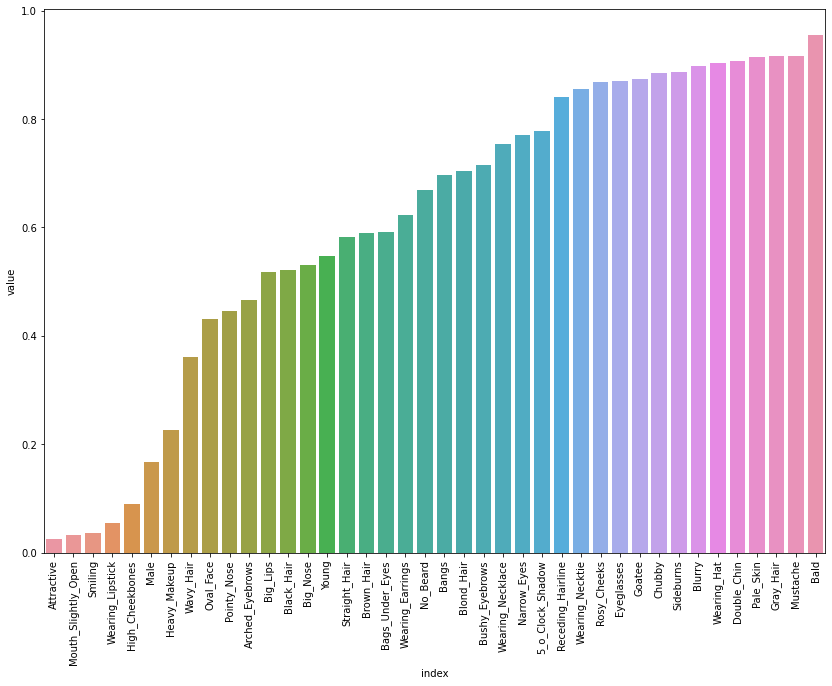

In [ ]:
diff_list = []
for i in range(1, len(data.columns)):  
    diff_list.append(abs(data.iloc[:,i].value_counts()[1]-data.iloc[:,i].value_counts()[0])/len(data))
diff_df = pd.DataFrame(diff_list, data.columns[1:]).reset_index()
diff_df.columns = ['index', 'value']

plt.figure(figsize=(14, 10))
sns.barplot('index', 'value', data = diff_df.sort_values('value'))
plt.xticks(rotation=90)
plt.show()

In [ ]:
diff_df[diff_df.value > 0.8].sort_values('value')

,index,value
28,Receding_Hairline,0.840443
38,Wearing_Necktie,0.854570
29,Rosy_Cheeks,0.868558
15,Eyeglasses,0.869762
16,Goatee,0.874471
13,Chubby,0.884866
30,Sideburns,0.886979
10,Blurry,0.898203
35,Wearing_Hat,0.903079
14,Double_Chin,0.906623


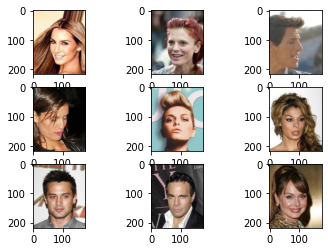

In [ ]:
folder = 'img_align_celeba/img_align_celeba/'

for i in range(1, 10):
    plt.subplot(330 + i)
    filename = folder + str(i).zfill(6) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
plt.show()

# CNN

In [1]:
import pandas as pd
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import backend
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import gc
import pickle

data = pd.read_csv("list_attr_celeba.csv")
data = data.replace(-1, 0)
data

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
202595,202596.jpg,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
202596,202597.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
202597,202598.jpg,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1


In [2]:
def fbeta(y_true, y_pred, beta=2):
    y_pred = backend.clip(y_pred, 0, 1)
    tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
    p = tp / (tp + fp + backend.epsilon())
    r = tp / (tp + fn + backend.epsilon())
    bb = beta ** 2
    fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
    return fbeta_score

# define cnn model
def define_model(in_shape=(128, 128, 3), out_shape=40):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(out_shape, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
    return model

model = define_model()

In [3]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_fbeta', verbose=1, save_best_only=True, save_weights_only= False, mode ='max', period=1)

folder = 'img_align_celeba/img_align_celeba/'
path = 'img_align_celeba/img_align_celeba/'

for round in range(20):
  print(round)
  photos, targets = list(), list()
  for filename in listdir(folder)[round*2000:(round+1)*2000]:
    photo = load_img(path + filename, target_size=(128,128))
    photo = img_to_array(photo, dtype='uint8')
    photos.append(photo)
    targets.append(asarray(data[data.image_id == filename].iloc[:,1:]))
    X = asarray(photos, dtype='uint8')
    y = asarray(targets, dtype='uint8')

  y = y.reshape(2000, 40)

  datagen = ImageDataGenerator(rescale=1.0/255.0)
  
  trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
  train_it = datagen.flow(trainX, trainY, batch_size=25)
  test_it = datagen.flow(testX, testY, batch_size=25)
  
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
                                validation_data=test_it, validation_steps=len(test_it), callbacks = checkpoint, epochs=8)
  if round != 19:
    del X, y, trainX, testX, trainY, testY, train_it, test_it, photos, targets, photo
  gc.collect()

0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
56/56 [==============================] - 5s 43ms/step - loss: 0.6701 - fbeta: 0.3971 - val_loss: 0.5084 - val_fbeta: 0.2648

Epoch 00001: val_fbeta improved from -inf to 0.26483, saving model to model.h5
Epoch 2/8
56/56 [==============================] - 2s 36ms/step - loss: 0.4830 - fbeta: 0.3680 - val_loss: 0.4942 - val_fbeta: 0.2728

Epoch 00002: val_fbeta improved from 0.26483 to 0.27275, saving model to model.h5
Epoch 3/8
56/56 [==============================] - 2s 36ms/step - loss: 0.4630 - fbeta: 0.3624 - val_loss: 0.4569 - val_fbeta: 0.3339

Epoch 00003: val_fbeta improved from 0.27275 to 0.33388, saving model to model.h5
Epoch 4/8
56/56 [==============================] - 2s 36ms/step - loss: 0.4534 - fbeta: 0.3699 - val_loss: 0.4749 - val_fbeta: 0.2855

Epoch 00004: val_fbeta did not improve from 0.33388
Epoch 5/8
56/56 [==============================] - 2s 36ms/step - loss: 0.4488 - fbeta: 0.3582 - val_loss: 0.4700 - val_fbeta: 0.3704

Epoch 00005: val_fbeta improve

In [4]:
f = open('history', 'wb')
pickle.dump(history.history, f)
f.close()

In [2]:
def fbeta(y_true, y_pred, beta=2):
    y_pred = backend.clip(y_pred, 0, 1)
    tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
    p = tp / (tp + fp + backend.epsilon())
    r = tp / (tp + fn + backend.epsilon())
    bb = beta ** 2
    fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
    return fbeta_score

loaded_model= load_model('model.h5', custom_objects = {'fbeta': fbeta})

In [3]:
loaded_model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='binary_crossentropy', metrics=[fbeta])
checkpoint = ModelCheckpoint('model.h5', monitor='val_fbeta', verbose=1, save_best_only=True, save_weights_only= False, mode ='max', period=1)

In [4]:
folder = 'img_align_celeba/img_align_celeba/'
path = 'img_align_celeba/img_align_celeba/'

for round in range(80,100):
  print(round)
  photos, targets = list(), list()
  for filename in listdir(folder)[round*2000:(round+1)*2000]:
    photo = load_img(path + filename, target_size=(128,128))
    photo = img_to_array(photo, dtype='uint8')
    photos.append(photo)
    targets.append(asarray(data[data.image_id == filename].iloc[:,1:]))
    X = asarray(photos, dtype='uint8')
    y = asarray(targets, dtype='uint8')

  y = y.reshape(2000, 40)

  datagen = ImageDataGenerator(rescale=1.0/255.0)
  
  trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
  train_it = datagen.flow(trainX, trainY, batch_size=25)
  test_it = datagen.flow(testX, testY, batch_size=25)
  
  history = loaded_model.fit_generator(train_it, steps_per_epoch=len(train_it),
                                validation_data=test_it, validation_steps=len(test_it), callbacks = checkpoint, epochs=8)
  if round != 99:
    del X, y, trainX, testX, trainY, testY, train_it, test_it, photos, targets, photo
  gc.collect()

80


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
56/56 [==============================] - 5s 45ms/step - loss: 0.2628 - fbeta: 0.6630 - val_loss: 0.2423 - val_fbeta: 0.6627

Epoch 00001: val_fbeta improved from -inf to 0.66268, saving model to model.h5
Epoch 2/8
56/56 [==============================] - 2s 39ms/step - loss: 0.2629 - fbeta: 0.6559 - val_loss: 0.2411 - val_fbeta: 0.6633

Epoch 00002: val_fbeta improved from 0.66268 to 0.66328, saving model to model.h5
Epoch 3/8
56/56 [==============================] - 2s 39ms/step - loss: 0.2578 - fbeta: 0.6581 - val_loss: 0.2412 - val_fbeta: 0.6576

Epoch 00003: val_fbeta did not improve from 0.66328
Epoch 4/8
56/56 [==============================] - 2s 39ms/step - loss: 0.2547 - fbeta: 0.6630 - val_loss: 0.2401 - val_fbeta: 0.6589

Epoch 00004: val_fbeta did not improve from 0.66328
Epoch 5/8
56/56 [==============================] - 2s 39ms/step - loss: 0.2492 - fbeta: 0.6607 - val_loss: 0.2413 - val_fbeta: 0.6625

Epoch 00005: val_fbeta did not improve from 0.66328
Epoch 6/

In [9]:
import pickle
file = open("history",'rb')
object_file = pickle.load(file)
object_file

[[[[{'fbeta': [0.5903444290161133,
      0.5926082730293274,
      0.6011461019515991,
      0.6027269959449768,
      0.6101943254470825,
      0.6111236810684204,
      0.6162572503089905,
      0.6138047575950623],
     'loss': [0.302153617143631,
      0.29923728108406067,
      0.2939181625843048,
      0.29150357842445374,
      0.2885473072528839,
      0.2854243814945221,
      0.28345105051994324,
      0.28274330496788025],
     'val_fbeta': [0.6383652091026306,
      0.6242197751998901,
      0.6371673941612244,
      0.6490809321403503,
      0.6456263065338135,
      0.6360191702842712,
      0.6402050256729126,
      0.6377574801445007],
     'val_loss': [0.27073654532432556,
      0.2653388977050781,
      0.2639614939689636,
      0.26485365629196167,
      0.26291221380233765,
      0.2634791433811188,
      0.2635616362094879,
      0.2619321644306183]},
    {'fbeta': [0.6099503636360168,
      0.6168566346168518,
      0.6216253042221069,
      0.6285557150840759,
  

In [6]:
object_file = [object_file] + [history.history]
f = open('history', 'wb')
pickle.dump(object_file, f)
f.close()

In [8]:
evaluate = {}
evaluate['fbeta'] = []
evaluate['loss'] = []
evaluate['val_fbeta'] = []
evaluate['val_loss'] = []
for i in range(len(object_file)):
  evaluate['fbeta'] += object_file[i]['fbeta']
  evaluate['loss'] += object_file[i]['loss']
  evaluate['val_fbeta'] += object_file[i]['val_fbeta']
  evaluate['val_loss'] += object_file[i]['val_loss']
evaluate

TypeError: ignored

In [8]:
# evaluate model
loss, fbeta = loaded_model.evaluate_generator(test_it, steps=len(test_it))
print('> loss=%.3f, fbeta=%.3f' % (loss, fbeta))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> loss=0.227, fbeta=0.692


In [17]:
five = object_file[1]

In [18]:
four = object_file[0][1]

In [19]:
three = object_file[0][0][1]

In [20]:
two = object_file[0][0][0][1]

In [24]:
one = object_file[0][0][0][0]

In [29]:
evaluate = {}

In [31]:
evaluate['fbeta'] = one['fbeta'] + two['fbeta'] + three['fbeta'] + four['fbeta'] + five['fbeta']
evaluate['loss'] = one['loss'] + two['loss'] + three['loss'] + four['loss'] + five['loss']
evaluate['val_fbeta'] = one['val_fbeta'] + two['val_fbeta'] + three['val_fbeta'] + four['val_fbeta'] + five['val_fbeta']
evaluate['val_loss'] = one['val_loss'] + two['val_loss'] + three['val_loss'] + four['val_loss'] + five['val_loss']

In [ ]:
evaluate['fbeta']

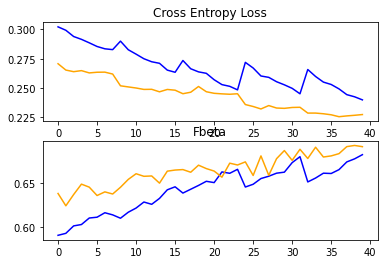

In [32]:
def summarize_diagnostics(evaluate):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(evaluate['loss'], color='blue', label='train')
    plt.plot(evaluate['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Fbeta')
    plt.plot(evaluate['fbeta'], color='blue', label='train')
    plt.plot(evaluate['val_fbeta'], color='orange', label='test')
    plt.show()
    
summarize_diagnostics(evaluate)

In [54]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [69]:
loaded_model.save('/content/MyDrive/MyDrive/model/model_v1.h5') 

In [70]:
!ls /content/MyDrive/MyDrive/model

model_v1.h5


In [53]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0